In [1]:
 %matplotlib inline

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# File to Load (Remember to change these)
city_data_to_load = "data_city_data.csv"
ride_data_to_load = "data_ride_data.csv"

In [4]:
# Read the City and Ride Data
city_data=pd.read_csv(city_data_to_load)
ride_data=pd.read_csv(ride_data_to_load)
city_data.head()
#ride_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [5]:
# Combine the data into a single dataset
city_ride_data=pd.merge(ride_data, city_data, on='city')
city_ride_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2018 10:14,13.83,5.739410e+12,5,Urban
1,Lake Jonathanshire,4/7/2018 20:51,31.25,4.441250e+12,5,Urban
2,Lake Jonathanshire,3/9/2018 23:45,19.89,2.389500e+12,5,Urban
3,Lake Jonathanshire,4/7/2018 18:09,24.28,7.796810e+12,5,Urban
4,Lake Jonathanshire,1/2/2018 14:14,13.89,4.242550e+11,5,Urban


In [6]:
sorted_types=city_ride_data.sort_values(['type'])
#sorted_types.head()

In [7]:
#rural cities & avg fare per city
rural_data=sorted_types.loc[sorted_types['type']=='Rural']
#rural_data
rural_data_sorted=rural_data.groupby('city')['fare'].mean()
#rural_data_sorted

In [8]:
#rural data #of rides per city
rural_data_rides=rural_data.groupby('city')['ride_id'].nunique()
#rural_data_rides

In [9]:
#rural data #drivers per city
driver_data=city_data.groupby('type')['driver_count'].sum()
#driver_data

In [11]:
#rural data #drivers per city
rural_data_drivers=rural_data.groupby('city')['driver_count'].sum()
rural_data_drivers.head()

city
Bradshawfurt      70
Garzaport         21
Harringtonfort    24
Jessicaport        6
Lake Jamie        24
Name: driver_count, dtype: int64

In [12]:
#add rural data to scatter plot
#plt.scatter((rural_data_rides), (rural_data_sorted), marker="o", facecolor='gold',edgecolors="black",
#s=(rural_data_drivers), label="Rural")

In [13]:
#suburban cities & avg fare per city
suburban_data=sorted_types.loc[sorted_types['type']=='Suburban']
#suburban_data.head()
suburban_data_sorted=suburban_data.groupby('city')['fare'].mean()
#suburban_data_sorted.head()

In [14]:
#suburban data #of rides per city
suburban_data_rides=suburban_data.groupby('city')['ride_id'].nunique()
#suburban_data_rides

In [25]:
#suburban data #drivers per city
suburban_data_drivers=suburban_data.groupby('city')['driver_count'].sum()
#suburban_data_drivers.head()

In [26]:
#urban cities & avg fare per city
urban_data=sorted_types.loc[sorted_types['type']=='Urban']
#urban_data.head()
urban_data_sorted=urban_data.groupby('city')['fare'].mean()
#urban_data_sorted.head()

In [27]:
#urban data #of rides per city
urban_data_rides=urban_data.groupby('city')['ride_id'].nunique()
#urban_data_rides

In [28]:
#urban data #drivers per city
urban_data_drivers=urban_data.groupby('city')['driver_count'].sum()
#urban_data_drivers.head()


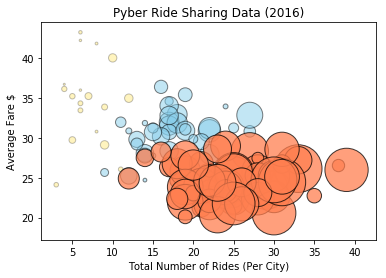

In [30]:
#add rural, suburban & urban data to scatter plot
plt.scatter((rural_data_rides), (rural_data_sorted), marker="o", facecolor='gold',edgecolors="black",alpha=0.25,
s=(rural_data_drivers), label='Rural')
plt.scatter((suburban_data_rides), (suburban_data_sorted), marker="o", facecolor='skyblue',edgecolors="black",alpha=0.50,
s=(suburban_data_drivers), label='Suburban')
plt.scatter((urban_data_rides), (urban_data_sorted), marker="o", facecolor='coral',edgecolors="black",alpha=0.75,
s=(urban_data_drivers), label='Urban')

plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare $")
plt.show()
###get help with labels...they are not showing up on drawing

In [31]:
#Three observable trends:
#The fares in rural areas are higher
#The closer to the city center you get the more drivers there are
#The closer to the city center you get there are more rides at a lower fare

In [32]:
#pie plots

In [33]:
#Total rides by City pie plot
#number of types & cities within each type
city_fares=city_ride_data.groupby('type')['fare'].sum()
#city_fares


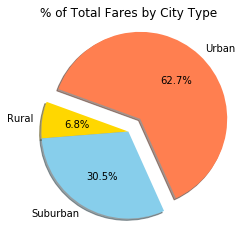

In [34]:
colors=['gold', 'skyblue','coral']
labels=['Rural','Suburban','Urban']
explode=(0,0,0.2)
plt.pie(city_fares, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis=('equal')
plt.title('% of Total Fares by City Type')
#plt.savefig('PyberPie1.jpg')
plt.show()

In [35]:
#number of types & cities within each type
city_rides=city_ride_data.groupby('type')['ride_id'].count()
#city_rides

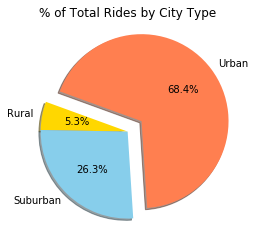

In [36]:
colors=['gold', 'skyblue','coral']
labels=['Rural','Suburban','Urban']
explode=(0,0,0.2)
plt.pie(city_rides, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis=('equal')
plt.title('% of Total Rides by City Type')
#plt.savefig('PyberPie1.jpg')
plt.show()
####how do I get this to display at an angle and why are my #'s off

In [37]:
#Total drivers by City pie plot
#number of types & cities within each type
#city_drivers=city_ride_data.groupby('type')['driver_count'].count()
driver_data
#these numbers are wrong...shoudld be 78, 490 & 2405  why am I not getting the correct #'s

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

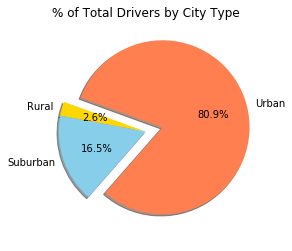

In [38]:
colors=['gold', 'skyblue','coral']
labels=['Rural','Suburban','Urban']
explode=(0,0,0.2)
plt.pie(driver_data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=160)
plt.axis=('equal')
plt.title('% of Total Drivers by City Type')
#plt.savefig('PyberPie1.jpg')
plt.show()